# Identify the Measures that we want to use from the data set by running correlation matricies 

### Import CSV files for State and County to be able to use as dataframes

In [1]:
#import dependancies
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Import CSV filepath
county_data = pd.read_csv('Resources/county_data.csv')
county_df = pd.DataFrame(county_data)

state_data = pd.read_csv('Resources/state_data.csv')
state_df = pd.DataFrame(state_data)

#show sample of county dataframe
county_df.sample(7)

,fips,state,county,adult_obesity_pct,adult_obesity_z,food_environment_index,food_environment_index_z,exercise_access_pct,exercise_access_z,excess_drinking_pct,...,poor_mental_health_z,dentists_ratio,dentists_num,dentists_rate,exercise_access_pct.1,unemployment_num,unemployment_pct,poor_physical_health_avg_days,housing_inad_facil,housing_overcrowding
273,8033,Colorado,Dolores,26.0,-2.502984,5.0,2.178307,19.389510,1.871118,18.106027,...,-0.251829,1228:1,2.0,81.46640,19.389510,34.0,2.961672,3.533645,2.043011,0.000000
435,13065,Georgia,Clinch,42.1,1.033027,7.0,0.480117,0.103719,2.719498,13.274745,...,1.551680,6662:1,1.0,15.01051,0.103719,84.0,2.771363,5.398191,1.844864,4.402516
1510,28157,Mississippi,Wilkinson,45.8,1.845650,6.3,1.074483,10.469314,2.263517,12.047309,...,-0.204728,4072:1,2.0,24.56097,10.469314,164.0,6.356589,4.581644,0.000000,0.000000
4,1007,Alabama,Bibb,39.6,0.483957,7.6,-0.029340,43.390302,0.815326,14.785821,...,0.979416,4401:1,5.0,22.72211,43.390302,219.0,2.509741,4.552795,1.997245,1.239669
563,15000,Hawaii,NaN,25.9,NaN,7.4,NaN,91.739545,NaN,20.007005,...,NaN,1111:1,1296.0,89.98775,91.739545,23622.0,3.492834,2.331640,1.947941,8.690402
614,17000,Illinois,NaN,34.3,NaN,8.4,NaN,90.598687,NaN,17.544403,...,NaN,1189:1,10586.0,84.13585,90.598687,295794.0,4.569887,3.231316,0.905497,2.383877
327,9013,Connecticut,Tolland,29.1,-1.822137,8.2,-0.538798,75.929313,-0.616062,17.522960,...,-0.867969,2059:1,73.0,48.57179,75.929313,3283.0,3.755906,3.072420,0.294249,1.150245


In [3]:
#show sample of state dataframe
state_df.sample(7)

,fips,state,adult_obesity_pct,food_environment_index,exercise_access_pct,excess_drinking_pct,uninsured_num,uninsured_pct,primary_care_phys_rate,prevent_hospital_rate,...,mental_health_rate,mental_health_num,dentists_ratio,dentists_num,dentists_rate,unemployment_num,unemployment_pct,poor_physical_health_avg_days,housing_inad_facil,housing_overcrowding
38,42000,Pennsylvania,33.3,8.5,86.139848,19.082797,681400.0,6.685892,79.08019,3014.0,...,269.58047,34970.0,1400:1,9263.0,71.40760,282694.0,4.363182,3.404988,1.064407,1.440195
24,28000,Mississippi,39.4,4.0,57.676970,15.671212,335624.0,14.331294,53.32267,3423.0,...,216.05023,6352.0,1939:1,1516.0,51.56363,49147.0,3.928526,3.731890,0.965835,2.370035
50,56000,Wyoming,32.2,7.1,77.861874,19.400269,71349.0,15.342122,69.79922,2215.0,...,383.56947,2230.0,1408:1,413.0,71.03775,10414.0,3.569397,3.462278,1.035459,2.015178
9,12000,Florida,28.3,7.2,87.471550,17.180965,2534999.0,15.098287,73.01275,3035.0,...,205.74675,45768.0,1563:1,14229.0,63.96544,313268.0,2.910788,2.969398,0.836557,2.972143
35,39000,Ohio,37.9,7.0,83.871440,19.998543,742266.0,7.843361,75.28003,3111.0,...,326.13823,38341.0,1535:1,7660.0,65.15790,230953.0,4.022669,3.591998,1.071923,1.365103
42,47000,Tennessee,35.5,6.5,67.407421,16.885919,670735.0,11.872540,69.58922,2896.0,...,187.93594,13252.0,1779:1,3963.0,56.20209,113469.0,3.385076,4.099334,0.883137,1.838069
41,46000,South Dakota,38.9,7.7,73.254333,22.434877,81086.0,11.460951,79.85472,2771.0,...,226.96697,2065.0,1561:1,583.0,64.07833,9819.0,2.066836,2.823575,1.220248,2.171726


### Let's find what metrics have correlation with a correlation heatmap - COUNTY LEVEL

<Axes: >

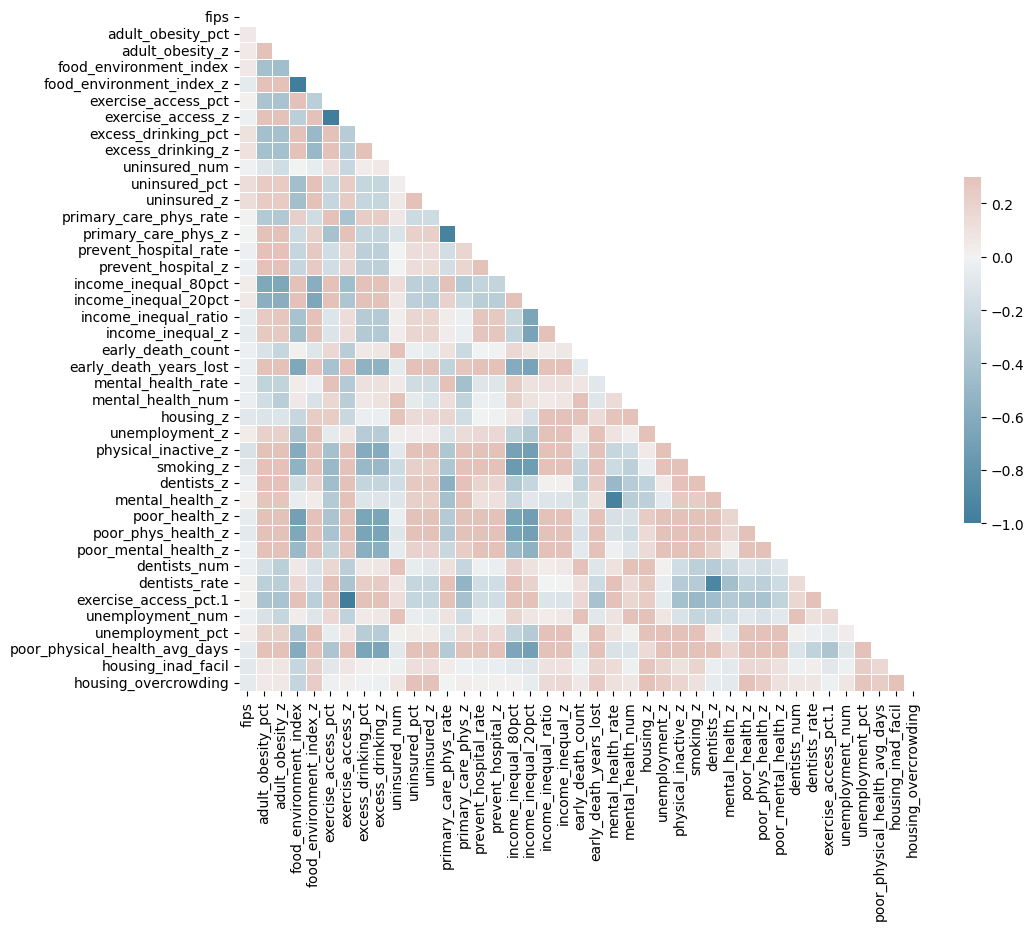

In [4]:
# Select only numerical columns to avoid errors on string values
numerical_df = county_df.select_dtypes(include=['number'])

# Compute the correlation matrix using the filtered numerical dataframe
corr = numerical_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [5]:
#Comment on Findings from the total correlation analysis


### Let's break this correlation analysis down further into groupings for health, socioeconomic and environmental factors

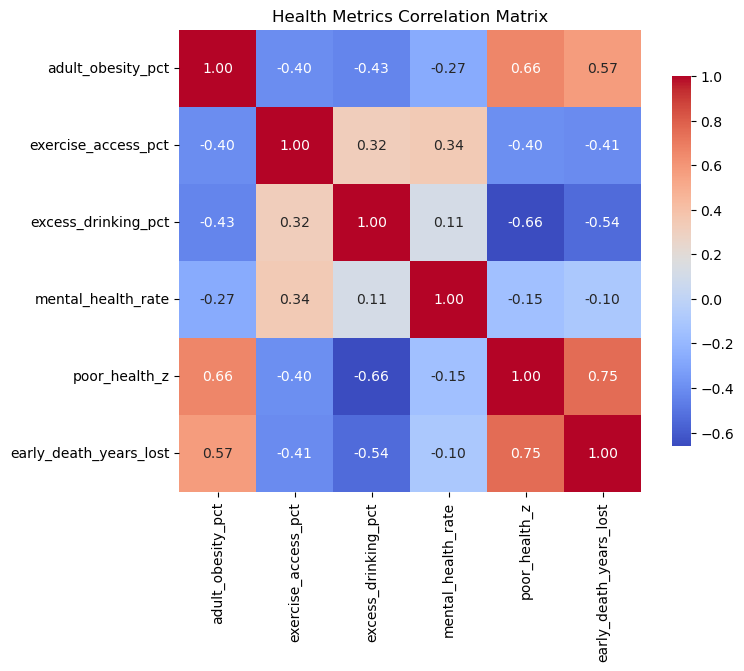

In [6]:
# Group the metrics into the corresponding factor subsets

health_metrics = ['adult_obesity_pct', 'exercise_access_pct', 'excess_drinking_pct', 'mental_health_rate', 'poor_health_z','early_death_years_lost']
socioeconomic_factors = ['uninsured_pct', 'income_inequal_80pct', 'income_inequal_20pct', 'income_inequal_ratio', 'unemployment_pct','early_death_years_lost']
environmental_factors = ['food_environment_index', 'housing_overcrowding', 'housing_z','early_death_years_lost']

# Create smaller correlation matrices
health_corr = corr.loc[health_metrics, health_metrics]
socioeconomic_corr = corr.loc[socioeconomic_factors, socioeconomic_factors]
environmental_corr = corr.loc[environmental_factors, environmental_factors]

# Function to plot heatmap
def plot_heatmap(corr_matrix, title):
    plt.figure(figsize=(8, 6))  # Adjust size as needed
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title(title)
    plt.show()

# Plot each heatmap
plot_heatmap(health_corr, 'Health Metrics Correlation Matrix')


#Poor mental health and poor physical health vs adult obesity pct
#early_death_years_lost vs food_environment_index,income_inequal cols, adult obesity, excess drinking, poor mental and physical health

In [7]:
#Comments on Analysis from the Health Factor Correlation Matrix

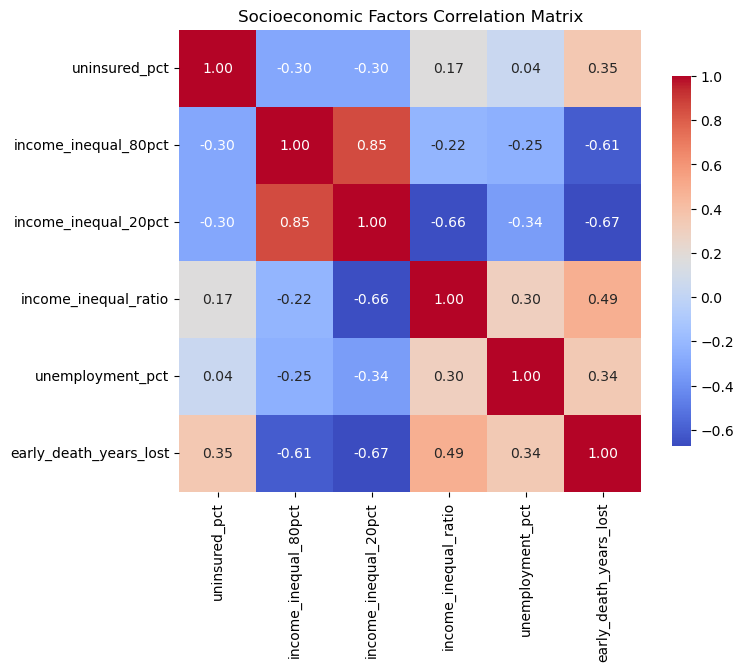

In [8]:
# Socioeconomic Factor Correlation Matrix
plot_heatmap(socioeconomic_corr, 'Socioeconomic Factors Correlation Matrix')


In [9]:
#Comments on Analysis from the Socioeconomic Factor Correlation Matrix

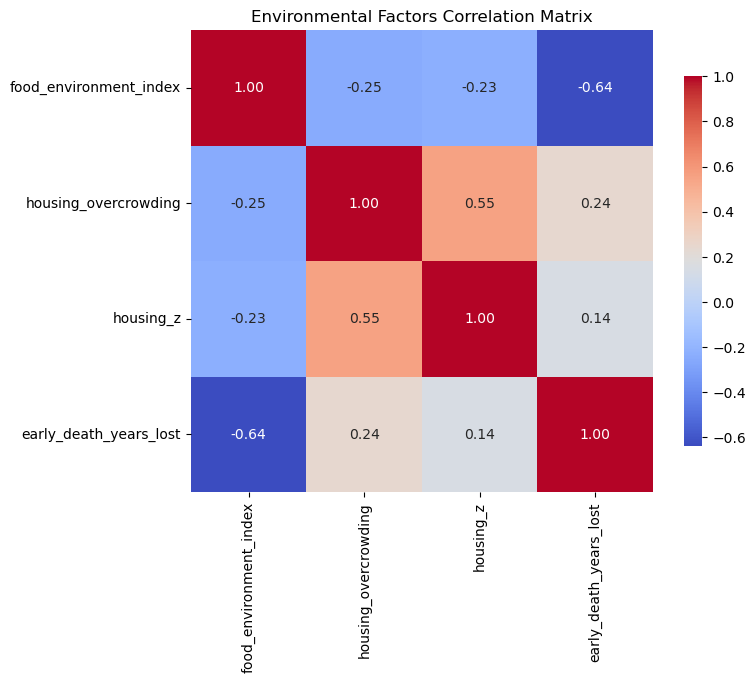

In [10]:
# Environmental Factor Correlation Matrix
plot_heatmap(environmental_corr, 'Environmental Factors Correlation Matrix')

In [11]:
#Comments on Analysis from the Environmental Factor Correlation Matrix